In [128]:
import os
import re
import cv2
import numpy as np
import sys
import shutil
from PIL import Image
from matplotlib import pyplot as plt

In [43]:
color_dict = {(0,0,0):0, # background
              (252,60,60):1, # 도복
              (247, 5,174):2, # 결주
              (24, 242, 231):3, # 도열병
              (9,33, 242):4, # 정상
             }
        

classname2id = {"도복": 1, "결주":2, "도열병":3, "정상":4}

In [3]:
sample_org_dir = '/datasets/rice/sample'
clss = os.listdir(sample_org_dir)

clss_dict = {}

In [133]:
renamed_dst = '/datasets/rice/sample_renamed'
os.makedirs(renamed_dst)

cls = '결주'
clss_dict[classname2id[cls]] = []
cls_dir = os.path.join(sample_org_dir, cls)
img_dir = os.path.join(cls_dir, '원천데이터')
anno_dir = os.path.join(cls_dir, 'PNG')
dst_img_dir = os.path.join(renamed_dst, '원천데이터')
dst_anno_dir = os.path.join(renamed_dst, 'PNG')

for file in os.listdir(img_dir):
    img_file = os.path.join(img_dir, file)
    anno_file = os.path.join(anno_dir, file)
    assert os.path.exists(img_file) and os.path.exists(anno_file)
    file_id = int(file.replace(')', '(').split('(')[1])
    new_file_id = file_id -1 if file_id != 1 else 6
    new_file_name = 'POC_1-01 ({}).png'.format(new_file_id)
    shutil.copy2(img_file, os.path.join(dst_img_dir, file))
    shutil.copy2(
    

In [134]:
os.listdir(img_dir)

['POC_1-01 (1).png',
 'POC_1-01 (2).png',
 'POC_1-01 (3).png',
 'POC_1-01 (4).png',
 'POC_1-01 (5).png',
 'POC_1-01 (6).png']

In [7]:
for cls in clss:
    clss_dict[classname2id[cls]] = []
    cls_dir = os.path.join(sample_org_dir, cls)
    img_dir = os.path.join(cls_dir, '원천데이터')
    anno_dir = os.path.join(cls_dir, 'PNG')
    
    for file in os.listdir(img_dir):
        img_file = os.path.join(img_dir, file)
        anno_file = os.path.join(anno_dir, file)
        assert os.path.exists(img_file) and os.path.exists(anno_file)
        clss_dict[classname2id[cls]].append((img_file, anno_file))

In [131]:
'/datasets/rice/sample/결주/원천데이터/POC_1-01 (2).png'.replace(')', '(').split('(')

['/datasets/rice/sample/결주/원천데이터/POC_1-01 ', '2', '.png']

In [75]:
def rgb2mask(img, color_dict):
    new_anno = np.zeros((img.shape[0], img.shape[1]))
    
    dists = []
    for rgb_code in color_dict.keys():
        cand_new = np.full(img.shape, rgb_code)
        dist = np.sum(np.abs(img - cand_new), axis=2)
        dists.append(dist)
        
    dists = np.stack(dists, axis=-1)
    new_anno = np.argmin(dists, axis=2)
    new_anno = new_anno.astype(np.uint8)
    
    
#     for row in range(img.shape[0]):
#         for column in range(img.shape[1]):
#             color = img[row, column]
            
#             dist = np.zeros(5)
#             for rgb_code in color_dict.keys():
#                 dist[color_dict[rgb_code]] = np.sum(np.abs(color - np.array(rgb_code)))
#             clss = np.argmin(dist)
#             new_anno[row, column] = clss
            
    return Image.fromarray(new_anno)

In [58]:
dst_dir = '/datasets/rice/sample_proc'
os.makedirs(os.path.join(dst_dir, 'img_dir', 'train'), exist_ok=True)
os.makedirs(os.path.join(dst_dir, 'img_dir', 'val'), exist_ok=True)
os.makedirs(os.path.join(dst_dir, 'ann_dir', 'train'), exist_ok=True)
os.makedirs(os.path.join(dst_dir, 'ann_dir', 'val'), exist_ok=True)

In [111]:
train_id = 0
val_id = 0
for cls in clss_dict.keys():
    samples = clss_dict[cls]
    num_vals = int(len(samples)/10)
    print(cls, num_vals)
    if num_vals==0:
        num_vals+=1
    
    for sample in samples[:num_vals]:
        img_file, anno_file = sample[0], sample[1]
        anno = cv2.imread(anno_file)
        anno = cv2.cvtColor(anno, cv2.COLOR_BGR2RGB)
        new_anno = rgb2mask(anno, color_dict)
        shutil.copy2(img_file, os.path.join(dst_dir, 'img_dir', 'val', '{}.png'.format(val_id)))
        new_anno.save(os.path.join(dst_dir, 'ann_dir', 'val', '{}.png'.format(val_id)))
        val_id +=1
        
    for sample in samples[num_vals:]:
        img_file, anno_file = sample[0], sample[1]
        anno = cv2.imread(anno_file)
        anno = cv2.cvtColor(anno, cv2.COLOR_BGR2RGB)
        new_anno = rgb2mask(anno, color_dict)
        shutil.copy2(img_file, os.path.join(dst_dir, 'img_dir', 'train', '{}.png'.format(train_id)))
        new_anno.save(os.path.join(dst_dir, 'ann_dir', 'train', '{}.png'.format(train_id)))
        train_id+=1


2 0
1 18
3 0


In [121]:
img = cv2.imread('/datasets/rice/sample/결주/원천데이터/POC_1-01 (2).png')
anno = cv2.cvtColor(anno, cv2.COLOR_BGR2RGB)


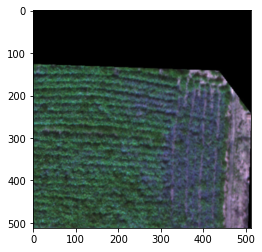

In [122]:
plt.imshow(img)

In [118]:
anno = cv2.imread('/datasets/rice/sample/결주/PNG/POC_1-01 (2).png')
anno = cv2.cvtColor(anno, cv2.COLOR_BGR2RGB)

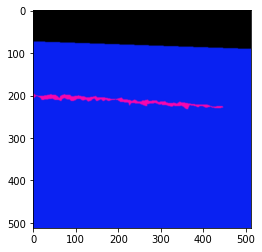

In [119]:
plt.imshow(anno)

In [108]:
cand_new = np.full(anno.shape, (1,1,1))
dist = np.sum(np.abs(anno- cand_new), axis=2)

In [109]:
np.stack((dist,dist), axis=-1).shape

(512, 512, 2)

In [81]:
new_anno = rgb2mask(anno, color_dict)

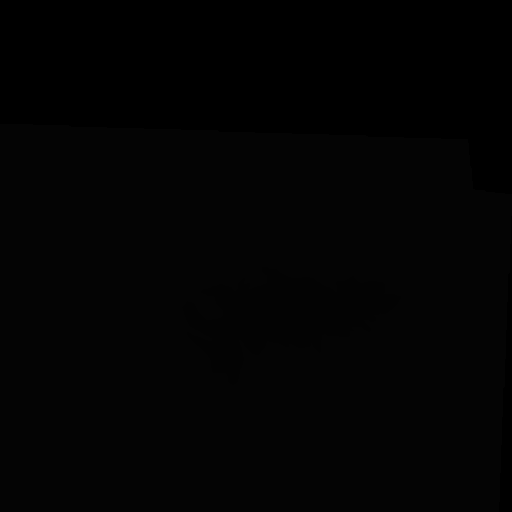

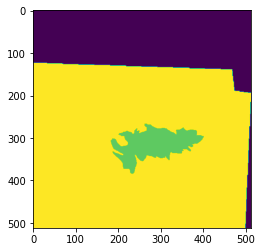

In [98]:
plt.imshow(np.array(new_anno))
new_anno

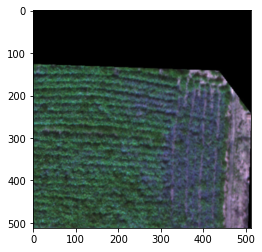

In [94]:
img = cv2.imread(os.path.join(dst_dir, 'img_dir', 'train', '0.png'))
anno = cv2.imread(os.path.join(dst_dir, 'ann_dir', 'train', '0.png'))
plt.imshow(img)

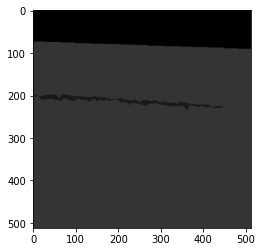

In [105]:
plt.imshow(np.array(anno)*13)

In [99]:
anno

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]]], dtype=uint8)